In [7]:
#%pip install opencv-python matplotlib numpy


In [2]:
%matplotlib inline

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 图像基本操作

### 读取彩色图像

In [20]:
img= cv2.imread('cat.jpg')

In [21]:
img

array([[[28, 20, 21],
        [28, 20, 21],
        [28, 20, 21],
        ...,
        [27, 22, 23],
        [27, 22, 23],
        [27, 22, 23]],

       [[28, 20, 21],
        [28, 20, 21],
        [28, 20, 21],
        ...,
        [27, 22, 23],
        [27, 22, 23],
        [27, 22, 23]],

       [[29, 21, 22],
        [29, 21, 22],
        [29, 21, 22],
        ...,
        [27, 22, 23],
        [27, 22, 23],
        [27, 22, 23]],

       ...,

       [[36, 22, 28],
        [36, 22, 28],
        [36, 22, 28],
        ...,
        [30, 22, 23],
        [30, 22, 23],
        [30, 22, 23]],

       [[36, 22, 28],
        [36, 22, 28],
        [36, 22, 28],
        ...,
        [28, 22, 23],
        [28, 22, 23],
        [28, 22, 23]],

       [[36, 22, 28],
        [36, 22, 28],
        [36, 22, 28],
        ...,
        [28, 22, 23],
        [28, 22, 23],
        [28, 22, 23]]], shape=(366, 550, 3), dtype=uint8)

In [5]:
"""
the image format is height x width x channels
28, 20, 21 means values in Blue, Green, Red channels
"""
img.shape

(366, 550, 3)

In [6]:
# 显示图像，"image"是显示图像的窗口名
cv2.imshow("image",img)
# 设置图像的显示时间，0表示按任意键关闭窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 定义一个函数来显示图像
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
cv_show("cat", img)

### 读取灰度图像

In [10]:
img= cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[21, 21, 21, ..., 23, 23, 23],
       [21, 21, 21, ..., 23, 23, 23],
       [22, 22, 22, ..., 23, 23, 23],
       ...,
       [25, 25, 25, ..., 23, 23, 23],
       [25, 25, 25, ..., 23, 23, 23],
       [25, 25, 25, ..., 23, 23, 23]], shape=(366, 550), dtype=uint8)

In [11]:
img.shape

(366, 550)

In [12]:
cv_show("cat", img)

In [13]:
cv2.imwrite('cat_gray.jpg', img)

True

In [14]:
type(img)

numpy.ndarray

In [15]:
img.size

201300

### 读取视频图像

In [29]:
"""
VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1
如果是视频文件，直接指定好路径即可
"""
vc= cv2.VideoCapture("chaplin.mp4")


In [30]:
"""
如果打开正确，open返回True，并且返回第一帧图像到frame
之后每进行一次cv.read则会读取下一帧图像
"""
if vc.isOpened():
    open, frame= vc.read()
else:
    open= False

In [ ]:
while open:
    ret, frame = vc.read()
    if ret is False:
        break
    if ret is True:
        gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow("video", gray)
        # 0xFF是按键的ASCII码，27是ESC键
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

### 颜色通道提取和合并

In [17]:
b,g,r= cv2.split(img)

In [ ]:
img= cv2.merge((b,g,r))

(366, 550, 3)

In [27]:
cur_img= img.copy()

In [28]:
cur_img[:,:,0]= 0
cur_img[:,:,1]= 0

In [29]:
cv_show("r", cur_img)

### 边界填充

In [47]:
top_size, bottom_size, left_size,right_size= 50, 50, 50, 50
replicate= cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REPLICATE)
reflect= cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT)
reflect101= cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap= cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT, value=[0,0,0])

(<matplotlib.image.AxesImage at 0x174184a2b10>, Text(0.5, 1.0, 'constant'))

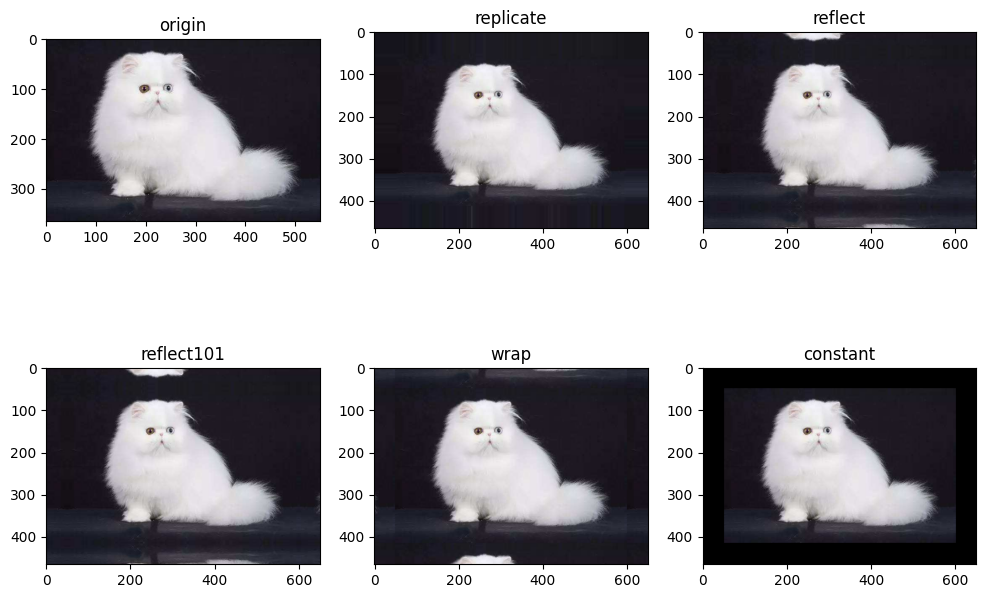

In [ ]:
fig, axs= plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0,0].set_title("origin")
axs[0, 1].imshow(cv2.cvtColor(replicate, cv2.COLOR_BGR2RGB)), axs[0,1].set_title("replicate")
axs[0, 2].imshow(cv2.cvtColor(reflect, cv2.COLOR_BGR2RGB)), axs[0,2].set_title("reflect")
axs[1, 0].imshow(cv2.cvtColor(reflect101, cv2.COLOR_BGR2RGB)), axs[1,0].set_title("reflect101")
axs[1, 1].imshow(cv2.cvtColor(wrap, cv2.COLOR_BGR2RGB)), axs[1,1].set_title("wrap")
axs[1, 2].imshow(cv2.cvtColor(constant, cv2.COLOR_BGR2RGB)), axs[1,2].set_title("constant")


### 图像尺寸调整和数值计算与图像融合

In [90]:
img_cat= cv2.imread('cat.jpg')
img_dog= cv2.imread('dog.jpg')



In [79]:
img_cat.shape

(366, 550, 3)

In [80]:
img_dog.shape

(865, 1200, 3)

In [96]:
# 调整图像尺寸
img_dog= cv2.resize(img_dog, (img_cat.shape[1], img_cat.shape[0]))
img_dog_ratio= cv2.resize(img_dog, (0, 0), fx=1, fy= 3)

In [82]:
img_dog.shape

(366, 550, 3)

In [97]:
cv_show("dog", img_dog_ratio)

In [85]:
img_cat[:5,:, 0]

array([[28, 28, 28, ..., 27, 27, 27],
       [28, 28, 28, ..., 27, 27, 27],
       [29, 29, 29, ..., 27, 27, 27],
       [30, 30, 30, ..., 27, 27, 27],
       [30, 30, 30, ..., 27, 27, 27]], shape=(5, 550), dtype=uint8)

In [86]:
img_dog[:5,:, 0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(5, 550), dtype=uint8)

In [ ]:
# 单纯相加，如果超出225取余数
(img_cat+ img_dog)[:5,:, 0]

array([[27, 27, 27, ..., 26, 26, 26],
       [27, 27, 27, ..., 26, 26, 26],
       [28, 28, 28, ..., 26, 26, 26],
       [29, 29, 29, ..., 26, 26, 26],
       [29, 29, 29, ..., 26, 26, 26]], shape=(5, 550), dtype=uint8)

In [ ]:
# 用cv2.add，如果超出255则取255
cv2.add(img_cat, img_dog)[:5,:, 0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(5, 1024), dtype=uint8)

In [88]:
# 图像融合
res= cv2.addWeighted(img_cat, 0.7, img_dog, 0.3, 0)

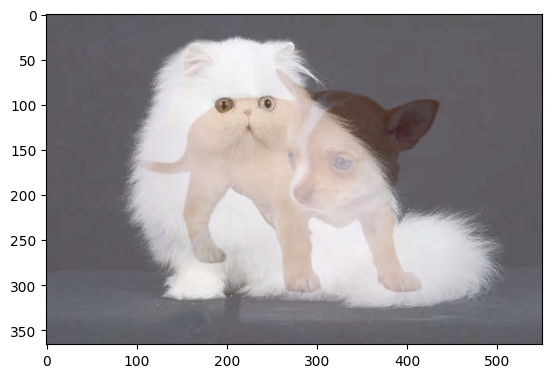

In [94]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))